# Seismology and Isostasy

IN THE SPACE BELOW, WRITE OUT IN FULL AND THEN SIGN THE HONOR PLEDGE:

“I pledge my honor that I have not violated the honor code during this examination.”

**PRINT NAME**: 

If a fellow student has contributed significantly to this work, please acknowledge them here:

**Peer(s)**:                          

*Contribution:*


By uploading this assignment through Canvas, I sign off on the document below electronically.

----

## Part I: Mountain building and isostasy

The mountain ranges are crated at the present subduction zones (for the Andes or the Himalayas) or past subduction zones (for the Appalachians) where the lithosphere is thickening due to the compressional stress and the volcanism.

<img src = "Images/Subduction_Zone.gif" width = "70%" >

Source: [USGS](https://www.usgs.gov/news/science-snippet/earthword-subduction)

Notice that the crust at the mountain belt is thickening not only upward but also downward to the asthenosphere. The elevation of the surface above the mean sea level is defined as "Relief". 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


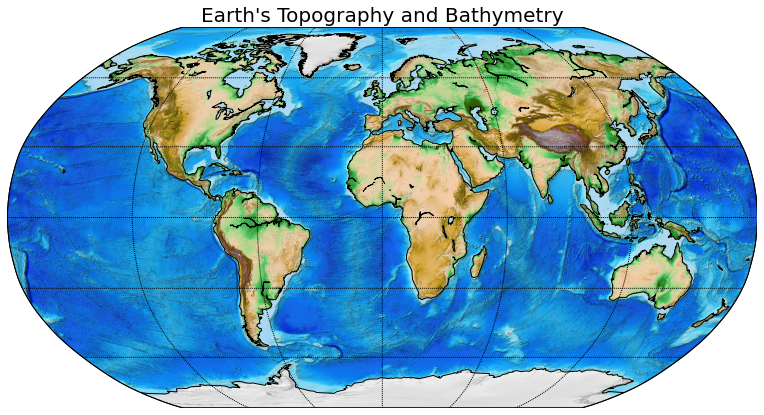

In [1]:
import os
os.environ['PROJ_LIB'] = os.path.join(os.environ['CONDA_PREFIX'],'share/proj') # This is required for Basemap plotting to work

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[14, 7])
# lon_0 is central longitude of projection.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawcoastlines()
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,90.,30.))
m.drawmeridians(np.arange(-180.,180.,60.))
m.drawmapboundary()
m.etopo()
plt.title("Earth's Topography and Bathymetry",fontsize=20)
plt.show()

**Question 1** Make a tran-section of the Himalayas and the Andes. What is the maximum relief?

**Answer**

<br><br/>
<br><br/>

As the mountains rise, they are subjected to erosion which eventually decreases the mountains' reliefs after they stop rising. The rate at which the relief decays is called "denudation rate." The figure below shows the denudation rate at Papua New Guinea and the large midlatitude basins.

<img src = "Images/Denudation_Rate.png" width = "90%" >

The denudation rate at a given setting linearly scales on the relief:

$$ \frac{dh}{dt} = -\alpha h $$

where $h$ is relief, and $\alpha$ depends on the setting.

**Question 2** How does the denudation rate vary with tectonic settings? Do you expect rates to vary depending on rock type?

**Answer**

<br><br/>
<br><br/>

**Question 3** Calculate $\alpha$ for the two settings: Papua New Guinea and Mid-Latitude basins by fitting straight lines on the data from `Files/Denudation_Papua_New_Guinea.csv` and `Files/Denudation_MidLatitude.csv`. 

Below is how to fit a straight line $y = mx + c$ using  `numpy.polyfit`

    p = np.polyfit(x, y, 1)
    
    # y-value of the best-fitted line
    y_fit = p[0] * x + p[1]

**Answer**

<br><br/>
<br><br/>

Since the top of the mountain is eroded away, the lithosphere block moves up due to the isostatic adjustment. As a result, the actual denudation rate is smaller than the denudation rate from the erosion only.

<img src = "Images/Isostasy.png" width = "70%" >

**Question 4** Modify the equation for denudation rate versus relief to account for isostasy. Make a figure of percentage of initial relief as a function of time. Assume Pratt isostasy where the litosphere has the same constant density of $\rho_c$ floating on top of the asthenosphere with the density of $\rho_m$.

**Answer**

Let $h_a$ and $h_b$ is the thickness of the lithosphere above and below the mean sea level, respectively. Then, the total thickness $h$ is the sum of $h_a$ and $h_b$. In this case, $h_a$ refers to the relief.

<u> Isostasy </u>

The pressure at the bottom of the lithosphere can be determined by two ways: 1. a column of lithosphere of a thickness of $h$ and 2. a column of mantle of a thickness of $h_b$. Both ways have to yield the same pressure. Otherwise, the pressure difference will adjust the elevation of the lithosphere until it reach the equillibrium.
    
\begin{align}
    \rho_c g h =& \rho_m g h_b \\
    \rho_c g h =& \rho_m g (h - h_a) \\
    h          =& \frac{\rho_m}{\rho_m - \rho_c} h_a
\end{align}

<u> Denudation </u>

From the original equation,
$$ \frac{dh_a}{dt} = -\alpha h_a $$

Since the lithosphere can immediately adjust its position to remain in isostatic equillibrium under the denudation, the change of the relief $h_a$ has to include the effect from isostatic adjustment. However, we can view denudation as a change in total thickness of the lithosphere instead:

$$ \frac{dh}{dt} = -\alpha h_a $$

<div style='color:green'>
If you are not satisfied with the explanation, we can introduce a term $R(t)$ to represent the relief change due to isostatic adjustment:

$$ \frac{dh_a}{dt} = -\alpha h_a + R(t) $$

Then, the change of the lithosphere's thickness below the mean sea level must be $-R(t)$, because there is not any mechanism that creates or removes this section of the lithosphere beside the isostatic adjustment:

$$ \frac{dh_b}{dt} = -R(t) $$

Combining the above two equation yield the change of the total thickness of the lithosphere.
</div>

Then, apply the relationship from isostasy:

\begin{align}
    \frac{d}{dt} \left(\frac{\rho_m}{\rho_m - \rho_c} h_a \right) =& -\alpha h_a \\
    \left(\frac{\rho_m}{\rho_m - \rho_c} \right) \frac{dh_a}{dt}  =& -\alpha h_a \\
    \frac{dh_a}{dt} &= - \frac{\alpha (\rho_m - \rho_c)}{\rho_m} h_a
\end{align}

Integrate the equation to obtain

$$ h_a(t) = h_a(0) e^{-\frac{\rho_m - \rho_c}{\rho_m} \alpha t} $$

Note that if $\rho_m >> \rho_c$, the litosphere is completely above the mantle. As a consequence, the lithosphere is not subjected to isostatic adjustment, and the above equation can be approximated to

$$ h_a(t) = h_a(0) e^{-\frac{\rho_m}{\rho_m} \alpha t} = h_a(0) e^{-\alpha t} $$

as expected.

**Question 5** Under these conditions, how much time is required to denude a mountain belt from 1 km relief to 100 m relief for the two settings in Question 3?

**Answer**

<br><br/>
<br><br/>

**Question 6** Given these mountain belts still exist, speculate on what factors prevent them from being denuded away by surface processes?

**Answer**

<br><br/>
<br><br/>

### Mini-tutorial: Primer in Fourier transforms


In [5]:
%matplotlib inline

from scipy.fftpack import fft
import numpy as np
from importlib import reload
import os
from scipy import signal
import matplotlib.pyplot as plt

#### Check normalization of FFT routines in Numpy

The Fourier transform takes a signal from the time into the frequency domain. One application of the Fourier transform is that we can recover the amplitudes and frequencies of a sampled signal.
We will use the package numpy.fft. The underlying code for these functions is an f2c-translated and
modified version of the FFTPACK routines. FFTPACK is a package of Fortran subprograms for the fast
Fourier transform of periodic and other symmetric sequences. It includes complex, real, sine, cosine, and quarter-wave transforms.

For example, consider the signal 2 · cos(4 · 2πt) + 5 · sin(10 · 2πt) composed of a cosine with amplitude 2, frequency 4, and a sine with amplitude 5 and frequency 10. Using rfft of the package numpy.fft, the script below computes the discrete Fourier transform on the real array of samples via the efficient Fast Fourier Transform algorithm. We recover the amplitudes and corresponding frequencies of the components of our signal. With matplotlib we plot the spectrum.

2.0*cos(4*2*pi*t)
5.0*sin(10*2*pi*t)


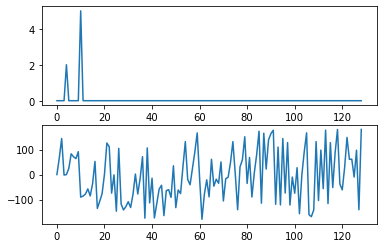

In [6]:
f = lambda t: 2*np.cos(4*2*np.pi*t) + 5*np.sin(10*2*np.pi*t)
n = 256
r = np.arange(0.0,1.0,1.0/n)
s = f(r)
F = np.fft.rfft(s)
m = n/2
p = lambda z: (abs(np.real(z))/m,abs(np.imag(z))/m)
t = p(F)
tol = 1.0e-8
for i in range(0,len(t[0])):
    if(t[0][i] > tol):
        print(str(t[0][i]) + '*cos(' + str(i) + '*2*pi*t)')
    if(t[1][i] > tol):
        print(str(t[1][i]) + '*sin(' + str(i) + '*2*pi*t)')
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(abs(F)/m)
plt.subplot(2, 1, 2)
plt.plot(np.angle(F,deg=True))
plt.show()